In [1]:
import config

import logging
import numpy as np

logger = logging.getLogger(__name__)

2023-05-15 17:29:08,185 - INFO     | config     | Loading environment variables


In [2]:
import glob
import pickle
import re

files = glob.glob('embeddings/*_test.pkl')
embeddings_data = {}

for file in files:
    logger.info(f'Loading {file}')
    match_obj = re.search(r'/(?P<output>[^_/]+)_', file)
    filename = match_obj.group('output')
    with open(file, 'rb') as fp:
        dict = pickle.load(fp)
        embeddings_data[filename] = dict

2023-05-15 17:29:08,280 - INFO     | __main__   | Loading embeddings/glove_embeddings_test.pkl
2023-05-15 17:29:08,284 - INFO     | __main__   | Loading embeddings/mpnet_embeddings_test.pkl
2023-05-15 17:29:08,287 - INFO     | __main__   | Loading embeddings/distil_embeddings_test.pkl
2023-05-15 17:29:08,289 - INFO     | __main__   | Loading embeddings/wiki_embeddings_test.pkl
2023-05-15 17:29:08,292 - INFO     | __main__   | Loading embeddings/w2v_embeddings_test.pkl


# Clustering

Testing on mpnet embeddings of GPT4All output.

In [3]:
mpnet_llama = embeddings_data['mpnet']['gpt4all']

In [47]:
from models.clustering import ClusteringModel

kmeans = ClusteringModel(model_name='dbscan',
                         min_samples=2,
                         metric='euclidean',
                         eps=0.1)

2023-05-15 17:36:43,573 - INFO     | models.clustering | Initializing DBSCAN
2023-05-15 17:36:43,573 - INFO     | models.clustering | EPS: 0.1 - MIN_SAMPLES: 2 - METRIC: euclidean


In [48]:
kmeans.fit_predict(embeddings=mpnet_llama)#, pca_flag=True, n_components=10)
clusters = kmeans.clusters
clusters

2023-05-15 17:36:43,807 - INFO     | models.clustering | DBSCAN: searching clusters...


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [33]:
from helpers.clustering_helpers import clustering_scores

kmeans_scores = clustering_scores(embeddings=mpnet_llama, clusters=clusters)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

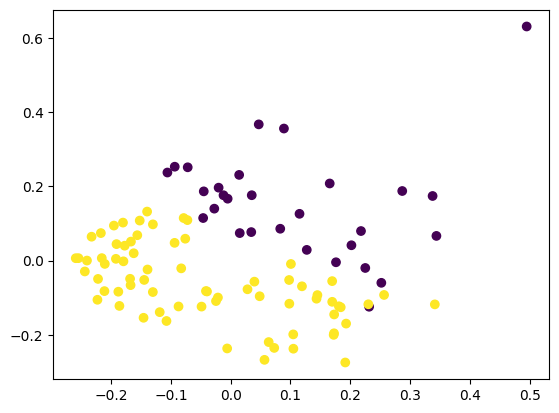

In [ ]:
from helpers.data_viz import plot_clusters

plot_clusters(embeddings=kmeans.embeddings, clusters=clusters)

In [ ]:
import pandas as pd

outputs = pd.read_parquet('outputs/0S_100T_all_models_202345.parquet')

In [ ]:
outputs['gpt4all_cluster'] = clusters

In [ ]:
outputs

,id,full_text,bloom,alpaca_3b,alpaca_770m,llama_13b,gpt4all,llama_7b,gpt4all_cluster
0,1642025557511532545,"the white paws, the cute collar, the tongue, t...","Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1. What is your analysis of the tweet in terms...,"\n\nAnswer:\n\nYes, the above tweet is a poten...",Yes. The reason is that it has all the charac...,1
1,1642522139130486787,city boy. see those sneakers abeg. the way he ...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1) Explain why you think it is a potential lea...,\nThe given tweet is not a potential lead as i...,"Yes, it is a potential lead because it shows ...",1
2,1642165846842966016,put it on a flame/heat safe surface and burn/...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...","Yes, it is a potential lead because it provid...",The tweet is not a potential lead as it does ...,"Yes, it is a potential lead because it is rel...",0
3,1642505628181569538,7| acquisitions: nike has made several acquisi...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1. The tweet is a potential lead because it ha...,\nThe given tweet is not a potential lead. Thi...,"▪️ Yes, because Nike has made several acquisit...",0
4,1642367629020266496,before: bilas air hangat aftercare: moisturizer,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...","Yes, it is a potential lead because it is an ...",The above tweet is not a potential lead as it...,"No, it is not a potential lead because it doe...",1
...,...,...,...,...,...,...,...,...,...
95,1640851780128100352,$169 in the 1970s? jesus. that was 1/2 the pr...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...","Yes, it is a potential lead because it has th...",The tweet is not a potential lead as it does ...,The tweet is not a potential lead as it does ...,1
96,1641906087107391488,"foodwise, which runs the ferry plaza farmers m...","Yes, the tweet is a potential lead because it...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1) The tweet is not a potential lead because i...,"\nYes, the above tweet is a potential lead as ...","Yes, it is a potential lead because it is a n...",1
97,1642529318835466247,check out this listing i just added to my #pos...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1) The tweet is not a potential lead because i...,"\nYes, the above tweet is a potential lead as ...",I think that it is not a potential lead becau...,1
98,1642537505412231168,thank you maybelline #maybellinexbini #bini_f...,"Yes, the above tweet is a potential lead. The...","Yes, this tweet is a potential lead because it...","Yes, the tweet is a potential lead because it ...",1. Explain why it is not a potential lead. ...,The above tweet is not a potential lead as it...,The above tweet is a potential lead because i...,1
